In [1]:
!pip install tensorflow-addons
!pip install wheel
!pip install pandas
!pip install opencv-python
!pip install matplotlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa

SEEDS=42

np.random.seed(SEEDS)
tf.random.set_seed(SEEDS)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
import numpy as np
import zipfile
from PIL import Image
from tensorflow.keras.utils import to_categorical

# Define the path to your zip file containing the dataset
zip_file_path = '/content/drive/MyDrive/CSE400 Thesis/Pothole Dataset 10000.zip'

# Define the directory where you want to extract the dataset
extracted_path = '/Downloads/FINAL_DATAS'

# Create the directory for extracted data
os.makedirs(extracted_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [13]:
train_path = "/Downloads/FINAL_DATAS/train"
test_path = "/Downloads/FINAL_DATAS/test"
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(128,128))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(128,128))

        x_test.append(img_arr)

In [14]:

x_train=np.array(x_train)
x_test=np.array(x_test)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 500,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (128, 128),
                                            batch_size = 500,
                                            class_mode = 'sparse')

y_train=training_set.classes
y_test=test_set.classes

num_classes  = 2
input_shape  = (128, 128, 3)

y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:

x_train=np.array(x_train)
x_test=np.array(x_test)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'sparse')

y_train=training_set.classes
y_test=test_set.classes

num_classes  = 2
input_shape  = (128, 128, 3)

y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [16]:
!pip install -U -q tensorflow-addons
from tensorflow.keras import layers
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
import numpy as np

In [17]:
num_classes  = 2
input_shape  = (128, 128, 3)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (8000, 128, 128, 3) - y_train shape: (8000, 2)
x_test shape: (2000, 128, 128, 3) - y_test shape: (2000, 2)


In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 128, 128, 3)
(8000, 2)
(2000, 128, 128, 3)
(2000, 2)


In [19]:
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
IMG_SIZE = 128
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
NUM_CLASSES=2
EPOCHS= 50
#LOG_DIR='./train-logs.csv'

In [20]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.image.convert_image_dtype(image, tf.float32) / 255.0
    return image, label

In [21]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.02),
        tf.keras.layers.experimental.preprocessing.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

In [22]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [23]:
# Training Pipeline
pipeline_train = (
    train_ds
    .shuffle(BATCH_SIZE*10)
    .map(preprocess_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=AUTO)
    .prefetch(AUTO)
)

# Validation Pipeline
pipeline_validation = (
    validation_ds
    .map(preprocess_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

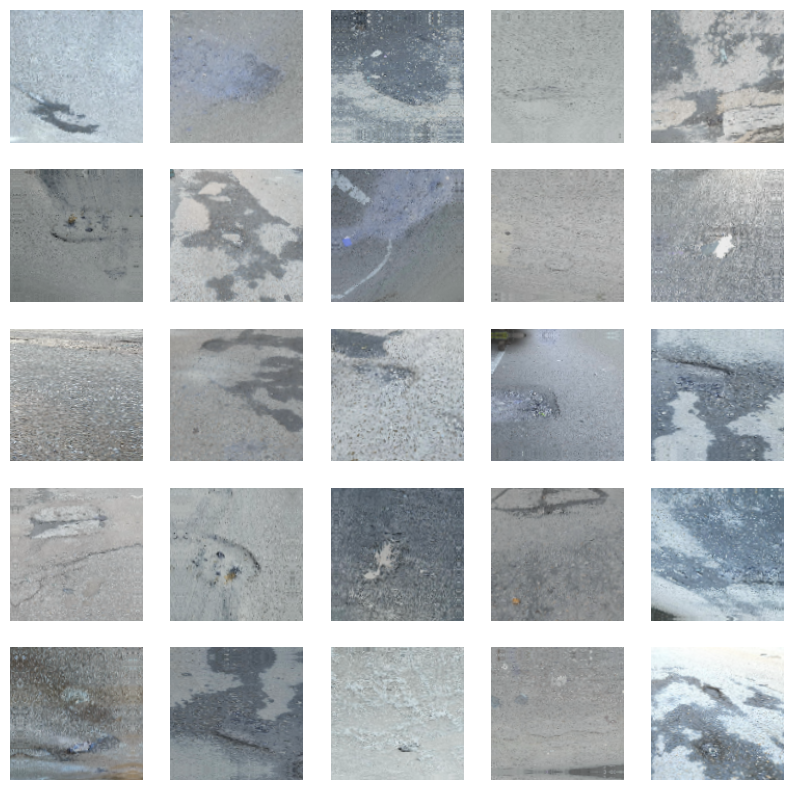

In [24]:
image_batch, label_batch = next(iter(pipeline_train))

plt.figure(figsize=(10, 10))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(image_batch[n])
    plt.axis("off")

In [25]:
def build_convmixer_model(num_filters=256, depth=8, kernel_size=2, patch_size=2):

    # Input layer
    input_layer = keras.Input((IMG_SIZE, IMG_SIZE, 3))

    # Patch embedding layer
    patch_layer = keras.layers.Conv2D(
        num_filters, kernel_size=patch_size, strides=patch_size
    )(input_layer)
    act_1 = tfa.layers.GELU()(patch_layer)
    bn_1 = keras.layers.BatchNormalization()(act_1)

    bn = bn_1

    # ConvMixer layer
    for i in range(depth):
        # Residual connection
        depth_conv_1 = keras.layers.DepthwiseConv2D(
            kernel_size=kernel_size, padding="same"
        )(bn_1)
        act_2 = tfa.layers.GELU()(depth_conv_1)
        bn_2 = keras.layers.BatchNormalization()(act_2)

        # Add skip connection
        add_1 = keras.layers.add([bn_2, bn])

        # Pointwise convolution layer
        conv_1 = keras.layers.Conv2D(num_filters, kernel_size=1, padding="same")(add_1)
        act_3 = tfa.layers.GELU()(conv_1)
        bn_3 = keras.layers.BatchNormalization()(act_3)

        bn = bn_3

    avg_pool = keras.layers.GlobalAvgPool2D()(bn_3)

    # Output layer
    output_layer = keras.layers.Dense(NUM_CLASSES, activation="softmax")(avg_pool)

    model = keras.Model(input_layer, output_layer, name="ConvMixer-Model")
    return model

In [26]:
model = build_convmixer_model(num_filters=256, depth=8, kernel_size=5, patch_size=2)
model.summary()

Model: "ConvMixer-Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 256)          3328      ['input_1[0][0]']             
                                                                                                  
 gelu (GELU)                 (None, 64, 64, 256)          0         ['conv2d[0][0]']              
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 256)          1024      ['gelu[0][0]']                
 Normalization)                                                                     

In [27]:
optimizer = tfa.optimizers.AdamW(learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
loss_fn = keras.losses.CategoricalCrossentropy()

In [28]:
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"],
)

In [29]:
checkpoint_filepath = "/tmp/checkpoint.keras"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=False,)

In [30]:
history = model.fit(
    pipeline_train,
    batch_size=BATCH_SIZE,
    epochs= EPOCHS,
    validation_data=pipeline_validation,
    callbacks=[checkpoint_callback])

Epoch 1/50
250/250 [==============================] - 268s 1s/step - loss: 0.5099 - accuracy: 0.8239 - val_loss: 1.1986 - val_accuracy: 0.5000
Epoch 2/50
250/250 [==============================] - 262s 1s/step - loss: 0.7562 - accuracy: 0.6102 - val_loss: 0.9463 - val_accuracy: 0.5000
Epoch 3/50
250/250 [==============================] - 262s 1s/step - loss: 0.7080 - accuracy: 0.5769 - val_loss: 1.4812 - val_accuracy: 0.5000
Epoch 4/50
250/250 [==============================] - 262s 1s/step - loss: 0.7165 - accuracy: 0.5905 - val_loss: 1.1636 - val_accuracy: 0.5000
Epoch 5/50
250/250 [==============================] - 261s 1s/step - loss: 0.6729 - accuracy: 0.6299 - val_loss: 0.7455 - val_accuracy: 0.6380
Epoch 6/50
250/250 [==============================] - 261s 1s/step - loss: 0.7600 - accuracy: 0.5717 - val_loss: 0.7922 - val_accuracy: 0.4625
Epoch 7/50
250/250 [==============================] - 261s 1s/step - loss: 0.6768 - accuracy: 0.6111 - val_loss: 0.7131 - val_accuracy: 0.5585

In [31]:
model.load_weights(checkpoint_filepath)
_, accuracy = model.evaluate(pipeline_validation)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

63/63 [==============================] - 21s 337ms/step - loss: 0.7455 - accuracy: 0.6380
Test accuracy: 63.8%


In [32]:
accuracy = model.evaluate(pipeline_validation)[1] * 100
print("Accuracy: {:.2f}%".format(accuracy))

63/63 [==============================] - 21s 335ms/step - loss: 0.7455 - accuracy: 0.6380
Accuracy: 63.80%


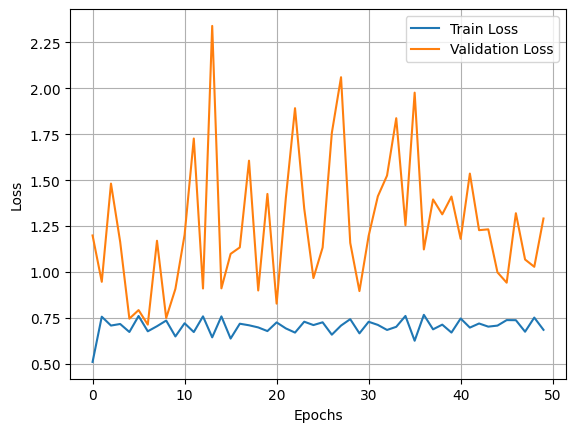

In [33]:
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
mpl.rcParams["figure.dpi"] = 300
plt.legend(['Train', 'Validation'], loc='upper left')
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams['font.family'] = "Times New Roman"
plt.legend()
plt.grid()
plt.show()

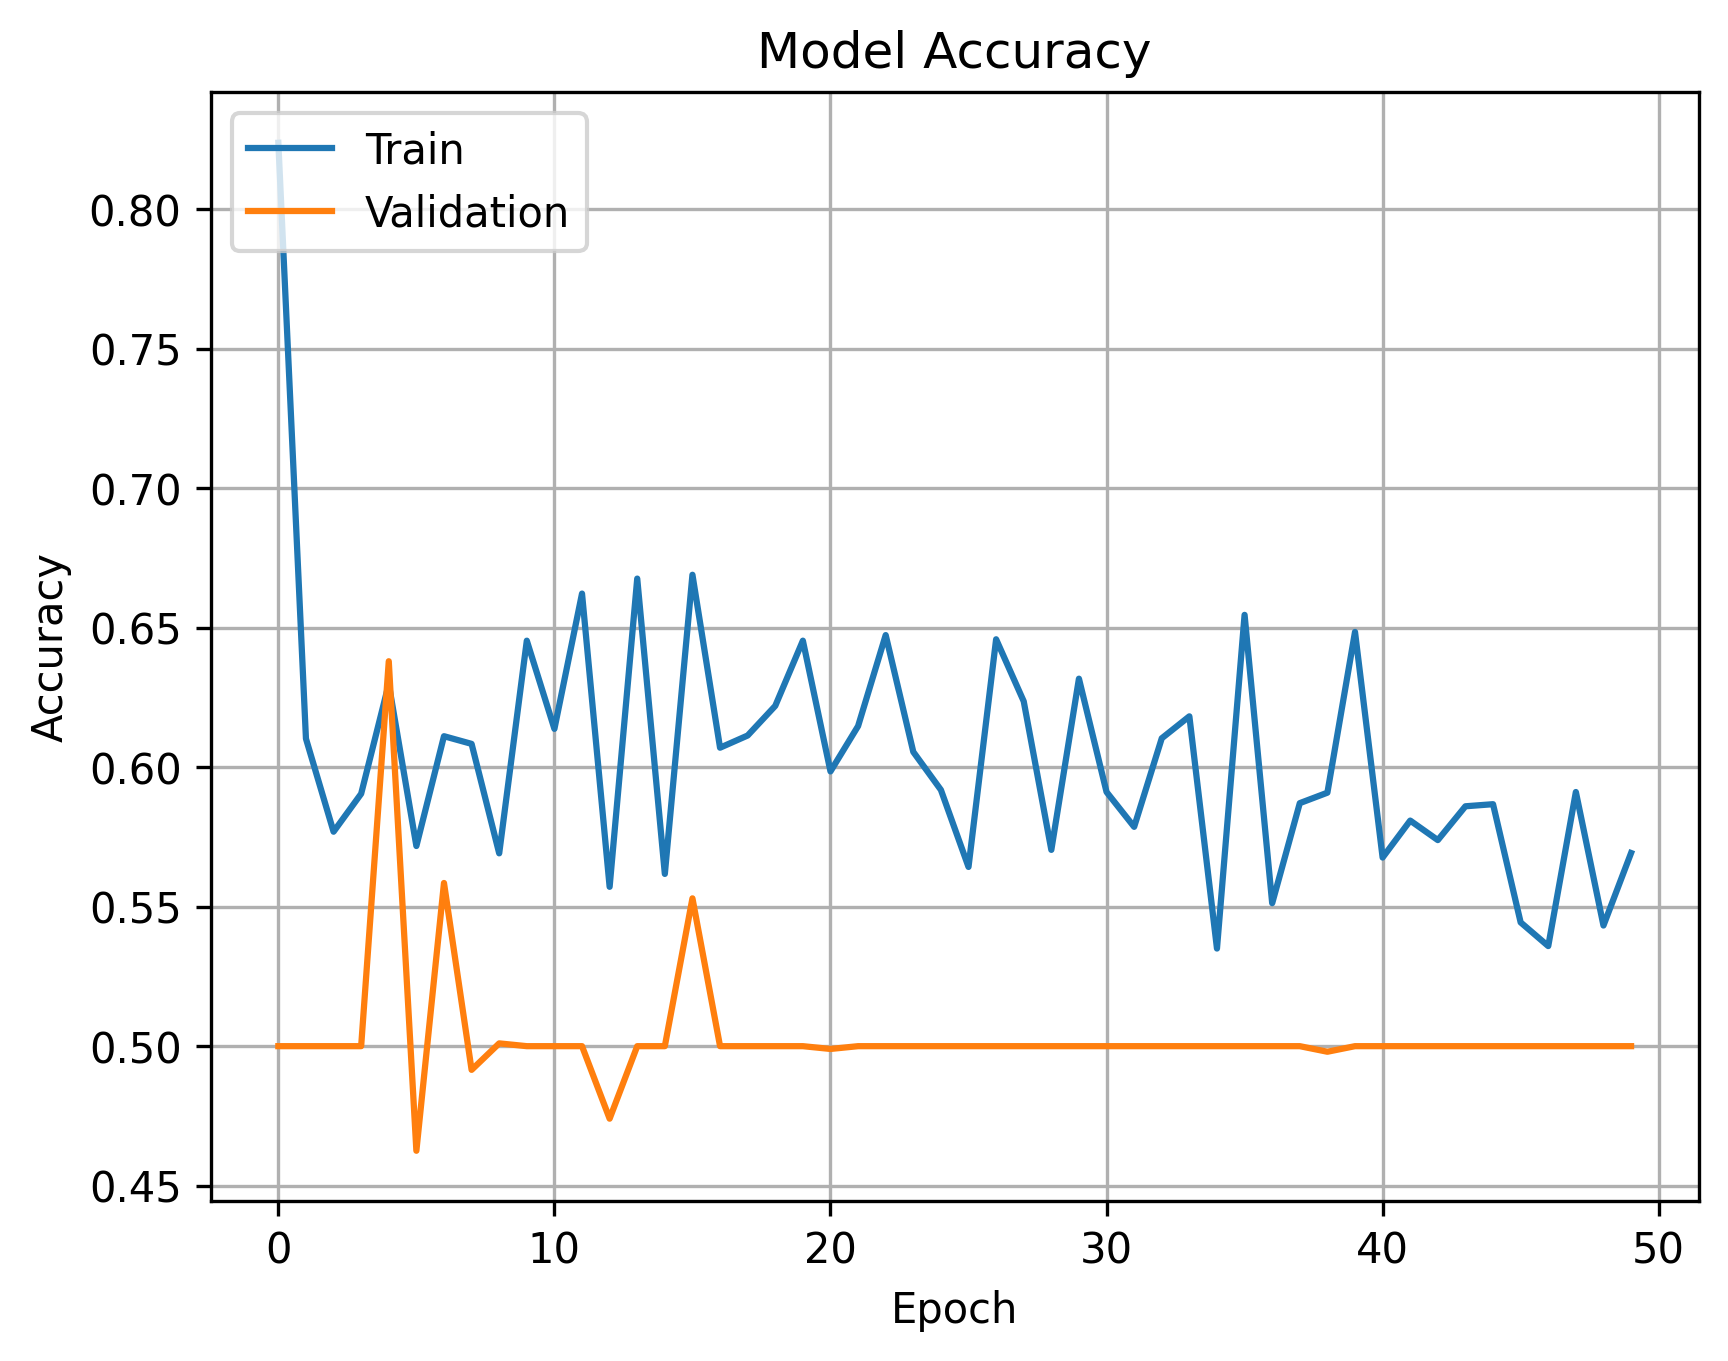

In [34]:
plt.figure(1)
import matplotlib as mpl
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
mpl.rcParams["figure.dpi"] = 300
plt.legend(['Train', 'Validation'], loc='upper left')
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams['font.family'] = "Times New Roman"
plt.grid()
plt.show()

In [37]:
import pathlib
import tensorflow as tf


data_dir = pathlib.Path('/Downloads/FINAL_DATAS/train')

img_height=128
img_width=128


train_ds  = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


In [38]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

normalization_layer = tf.keras.layers.Rescaling(1./255)


import numpy as np
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 8000 files belonging to 2 classes.
Using 1600 files for validation.
0.21666668 0.6813726


In [39]:
train_label = np.concatenate([y for x, y in train_ds], axis=0)
print(train_label.shape)

test_label = np.concatenate([y for x, y in val_ds], axis=0)
print(test_label.shape)

(6400,)
(1600,)


In [40]:
import scipy
# if this works
from scipy.sparse import issparse

In [45]:
!pip install scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
#model = keras.Model(input, output)
Y_pred = model.predict_generator(val_ds, 700)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names = ['normal', 'pothole']
print(classification_report(test_label, y_pred, target_names=target_names))

<ipython-input-45-053c4251b337>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(val_ds, 700)


Confusion Matrix
[[  0 820]
 [  0 780]]
Classification Report
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00       820
     pothole       0.49      1.00      0.66       780

    accuracy                           0.49      1600
   macro avg       0.24      0.50      0.33      1600
weighted avg       0.24      0.49      0.32      1600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


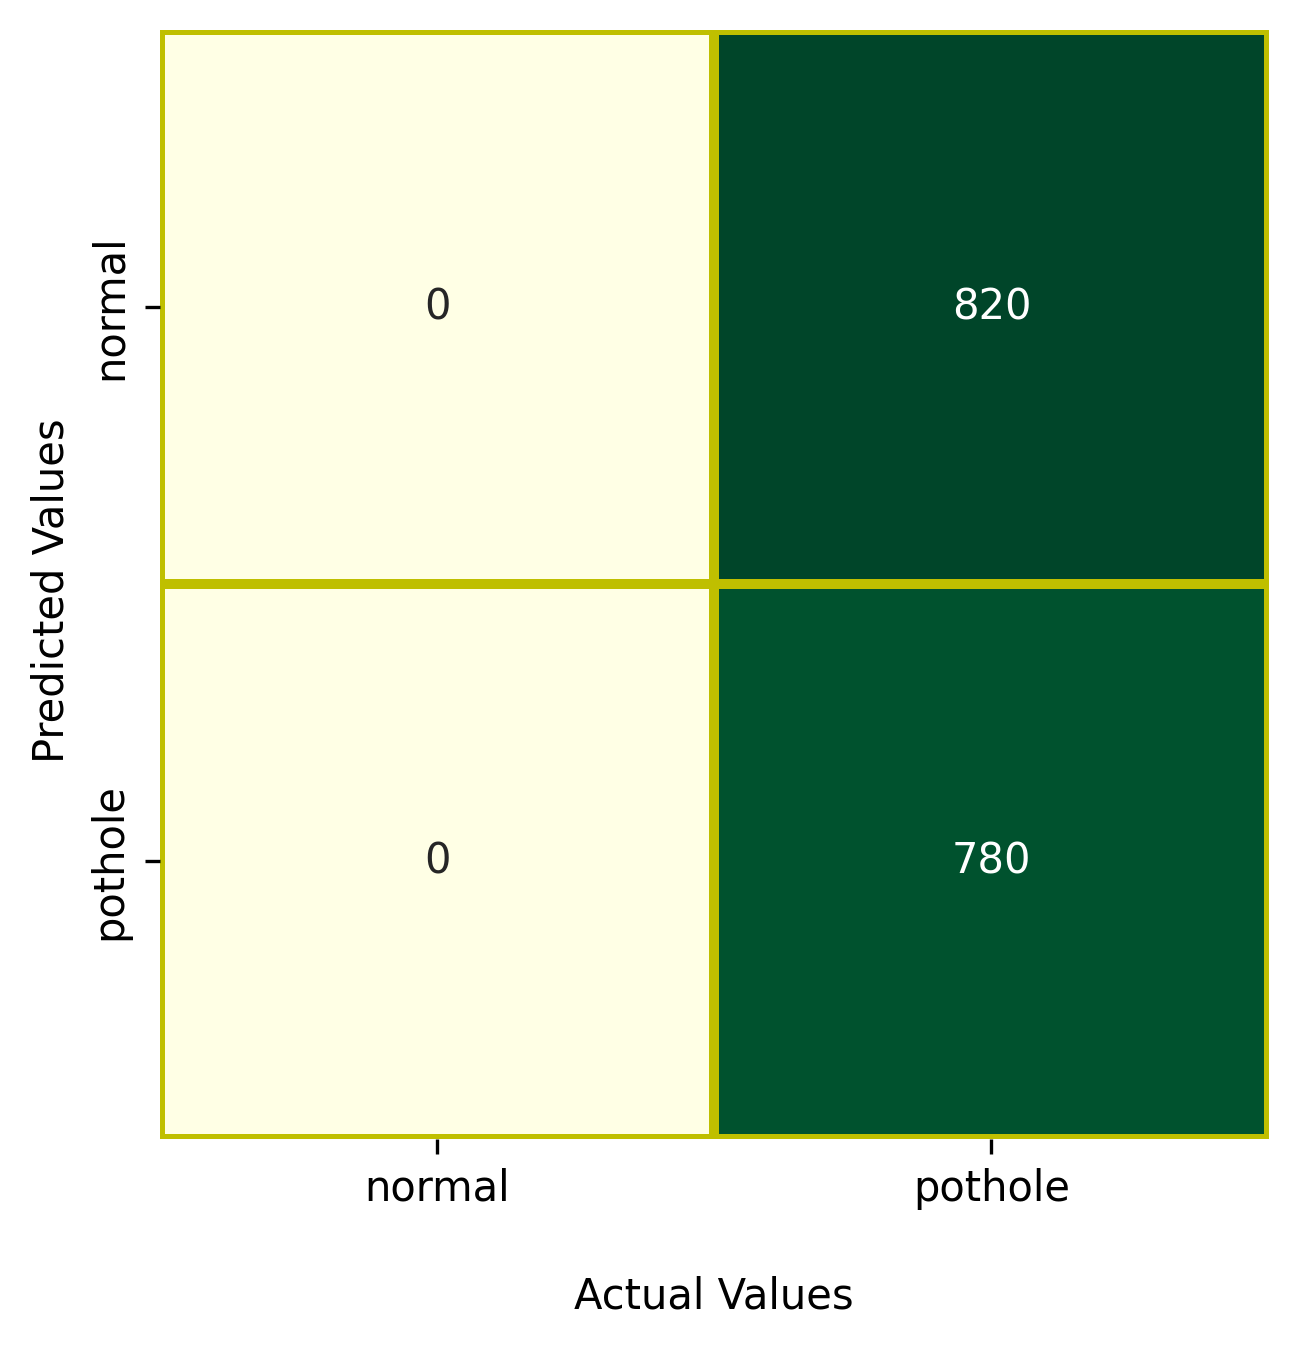

In [43]:
!pip install seaborn
import seaborn as sns
ax=sns.heatmap(cm, annot=True, cmap='YlGn', cbar=False, linewidths=2, linecolor='y', square=True, xticklabels=target_names,yticklabels=target_names,fmt='')
#sns.heatmap(cm, annot=True,annot_kws={"size": 22})
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams['font.family'] = "Times New Roman"
# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

In [46]:
model.summary()

Model: "ConvMixer-Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 256)          3328      ['input_1[0][0]']             
                                                                                                  
 gelu (GELU)                 (None, 64, 64, 256)          0         ['conv2d[0][0]']              
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 256)          1024      ['gelu[0][0]']                
 Normalization)                                                                     